
######*Syed Zain Raza*
----
##Goal

Your goal in this part of assigment is to implement a Decision Tree Classifier for continuous variables.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

##Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

##Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



###Decision Tree Classifier

Now in this assignment we will be implementing the Decision Classifier for both Continuous and Categorical attributes.

Decision tree can be built by using any of the following split criterias, namely:
 - Information Gain
 - Gini Index
 - CART 

However, you are required here to implement the decision tree with information gain as splitting criterion.

Remember in my code i am not looking for maximizing the information gain, instead i am looking for minimizing the split entropy. Recall,
$$Information Gain  = H(D) - H(D_Y,D_N)$$

Where,

$H(D)$ is the data set entroy and $H(D_Y,D_N)$ is split entropy. Since $H(D)$ is constant for the given dataset so maximizing the entropy is equal to minimizing the split entropy and that is what is being represented in my code outputs.

In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
from collections import defaultdict
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


#### TODO: You have to implement the following two classes, and the parts below...

In [2]:
class Node:
    def __init__(self, purity,klasslabel='',score=0,split=[],fidx=-1):
        '''
            purity: purity level at which to stop
            klasslabel: klasslabel of the node, (for leaf node)
            score: information gain of the newly added node
            split: splitting threshold
            fidx: feature index
            
        '''
        
        self.lchild=None       
        self.rchild=None
        self.klasslabel=klasslabel        
        self.split=split
        self.score=score
        self.fidx=fidx
        self.purity=purity
        
    def set_childs(self,lchild,rchild):
        '''
            function used to set the childs of the node
        '''
        self.rchild = rchild
        
        self.lchild = lchild
        
        
        
    def isleaf(self):
        '''
            returns true if current node is leaf
        '''
        if self.lchild == None and self.rchild == None:
            return True
        else:
            return False
        
    def isless_than_eq(self, X):
        '''
            returns if value for the given example at selected feature index <= spliting threshold
        '''
        
        if X <= self.split:
            return True
        else:
            return False
        
        
    def get_str(self):
        '''
            returns a string representing the node information...
        '''
        if self.isleaf():
            return 'C(class={},Purity={})'.format(self.klasslabel,self.purity)
        else:
            return 'I(Fidx={},Score={},Split={})'.format(self.fidx,self.score,self.split)
    

In [3]:
### import pdb
## Your code goes here...

class DecisionTree:
    ''' Implements the Decision Tree For Classification... '''
    def __init__(self, purityp, exthreshold, maxdepth=10):        
        '''
            
            purityp= purity level at which we should stop growing the tree
            exthreshold= stop if number examples at a given node are less than exthreshold
            depth= maximum depth upto which we should grow the tree. Remember a tree with depth=10 
                has 2^10=1K child nodes.
            
        '''
        self.purity=purityp
        self.exthreshold=exthreshold
        self.maxdepth=maxdepth
        pass
    def train(self, X, Y):
        ''' Train Decision Tree using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        nexamples,nfeatures=X.shape
        ## now go and train a model for each class...
        self.classes=np.unique(Y)
        self.tree = self.build_tree(X,Y)
        
    def build_tree(self, X, Y, depth = 0):
        """ 
            Function is used to recursively build the decision Tree 
          
            Input
            -----
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            depth: current depth of the tree
            Returns
            -------
            root node of the built tree...
        """
        nexamples, nfeatures=X.shape
      
        klasses = np.unique(Y);
        
        Purity_Maximum = 0
        
        Class_index_maximum = 0
        
        for i,j in enumerate(klasses):
            purity = np.sum(Y == j) / (len(Y)*1.0)
            if purity > Purity_Maximum:
                Purity_Maximum = purity
                Class_index_maximum = i
                

        if (nexamples < self.exthreshold) or (Purity_Maximum > self.purity) or (depth > self.maxdepth):
            req_node = Node(purity = Purity_Maximum,klasslabel = klasses[Class_index_maximum])
            return req_node
        
        req_Split_point = np.array([])
        
        score = 0
        
        fidx = -1
        
        for examples in range(nfeatures):
            Req_new_Score,newreq_Split_point = self.evaluate_numerical_attribute(X[:,examples],Y)
            if(Req_new_Score>score):
                req_Split_point = newreq_Split_point
                score = Req_new_Score
                fidx = examples
            
        
        Req_new_Crd = X[:,fidx]<=req_Split_point
        
        Rev_newCrd = np.logical_not(Req_new_Crd)
        
        z1 = X[Req_new_Crd]
        
        z2 = Y[Req_new_Crd]
        
        z3 = X[Rev_newCrd]
        
        z4 = Y[Rev_newCrd]
        
        node = Node(purity = Purity_Maximum, score = score ,split = req_Split_point, fidx = fidx)
        
        node.set_childs(self.build_tree(z1,z2,depth+1),  self.build_tree(z3,z4,depth+1))
        
        return node
        
        
    def test(self, X):
        
        ''' Test the trained classifiers on the given set of examples 
        
                   
            Input:
            ------
                X: [m x d] a data matrix of m d-dimensional test examples.
           
            Returns:
            -----------
                pclass: the predicted class for each example, i.e. to which it belongs
        '''
        
        nexamples, nfeatures=X.shape
        pclasses=self.predict(X)
       
        
        return np.array(pclasses)
    def evaluate_numerical_attribute(self,feat, Y):
        '''
            Evaluates the numerical attribute for all possible split points for
            possible feature selection
            
            Input:
            ---------
            feat: a contiuous feature
            Y: labels
            
            Returns:
            ----------
            v: splitting threshold
            score: splitting score
            Xlidx: Index of examples belonging to left child node
            Xridx: Index of examples belonging to right child node
            
        '''
        # Remember to clip the log value, 
        # i.e. maximum(minimum(x-np.spacing(1),1), np.spacing(1))
        # before computing entropy otherwise your 
        # code will give invalide results...
        
        # helpful functions can be np.logical_and() and np.logical_not()
        
        # A big source of Bugs will be sorting the same array and expecting it to behave like original,
        # use separate variables to store the sorted array and its corresponding classes labels...
        
        
        classes=np.unique(Y)
        
        nclasses=len(classes)
        
        sidx = np.argsort(feat) # sorted index of features
        
        f = feat[sidx] # sorted features
        
        sY = Y[sidx] # sorted features class labels...

        middle_Points = np.unique(f)
        
        middle_Points = (middle_Points[:-1] + middle_Points[1:])/2.0
         

      
        
        Information_Gain_Minimum = 0.0
        
        req_Split_point = -1
  
        dataset_Entropy = 0.0 
        
        
        
        for i in self.classes:
            req_Prob = (np.sum(sY==i)*1.0)/len(sY)
            dataset_Entropy+=(req_Prob*np.log2(np.max([np.min([req_Prob-np.spacing(1),1]), np.spacing(1)])))
        
        dataset_Entropy=-1*dataset_Entropy

        for middle_Point in middle_Points:
            Req_DY_Entropy = 0.0
            Req_DN_Entropy = 0.0
            DY = sY[f<=middle_Point]
            DN = sY[f>middle_Point]
            
                     
            for i in self.classes:
                req_Prob_CY=(np.sum(DY==i)*1.0)/len(DY)
                Req_DY_Entropy+=(req_Prob_CY*np.log2(np.max([np.min([req_Prob_CY-np.spacing(1),1]), np.spacing(1)])))
                req_Prob_CN=(np.sum(DN==i)*1.0)/len(DN)
                Req_DN_Entropy+=(req_Prob_CN*np.log2(np.max([np.min([req_Prob_CN-np.spacing(1),1]), np.spacing(1)])))
            
            
            
            Req_DY_Entropy = -1*Req_DY_Entropy
            Req_DN_Entropy = -1*Req_DN_Entropy
            Req_Entropy_Split = ((len(DY)*1.0)/len(sY)*Req_DY_Entropy) + ((len(DN)*1.0)/len(sY)*Req_DN_Entropy)
            IG = dataset_Entropy - Req_Entropy_Split
            

            if IG>Information_Gain_Minimum:
                Information_Gain_Minimum=IG
                req_Split_point=middle_Point
        
            
                 
            
            
        return Information_Gain_Minimum,req_Split_point
        
            
        
    def predict(self, X):
        
        """
        Test the trained classifiers on the given example X
        
                   
            Input:
            ------
            X: [1 x d] a d-dimensional test example.
           
            Returns:
            -----------
                pclass: the predicted class for the given example, i.e. to which it belongs
        """
        z=[]
        ans = []
        
        for idx in range(X.shape[0]):
            self._predict(self.tree,X[idx,:],ans)
            z.append(ans[0])
            ans=[]
        
        
        return z 
    
        		
    def _predict(self,node, X,ans):
        
        """
            recursively traverse the tree from root to child...
            and return the child node label..
        """
        if node.isleaf()==True:
            lbl= node.klasslabel
            ans.append(lbl)
            return ans
       
        if X[node.fidx]<=node.split:
            self._predict(node.lchild,X,ans)
        else:
            self._predict(node.rchild,X,ans)
        
    
    
    

    def __str__(self):
        """
            overloaded function used by print function for printing the string
        """
        return self.__print(self.tree)        
        
     

    #     def _print(self, node):
#         """
#             Recursive function traverse each node and extract each node information
#             in a string and finally returns a single string for printing purposes...
#         """
#         if not node:
#             return
#         if node.isleaf():
#             return node.get_str()
        
#         string=node.get_str()+self._print(node.lchild)
#         return string+node.get_str()+self._print(node.rchild)
    
    def find_depth(self):
        """
            returns the depth of the tree...
        """
        return self._find_depth(self.tree)
    def _find_depth(self,node):
        """
            recursively traverse the tree to the depth of the tree and return the
            depth...
        """
        if not node:
            return
        if node.isleaf():
            return 1
        else:
            return max(self._find_depth(node.lchild),self._find_depth(node.rchild))+1
    def __print(self,node,depth=0):
        
        ret = ""

        # Print right branch
        if node.rchild:
            ret += self.__print(node.rchild,depth+1)

        # Print own value
        
        ret += "\n" + ("    "*depth) + node.get_str()

        # Print left branch
        if node.lchild:
            ret += self.__print(node.lchild,depth+1)
        
        return ret   

In [4]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

In [5]:
#load the data set
data=pd.read_csv('iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [6]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape   


 Data Set Dimensions= (149L, 4L)  True Class labels dimensions (149L,)


In [7]:
print Y

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

In [8]:
Y[Y=='Iris-virginica']='Iris-versicolor'
print Y, len(Y), np.unique(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

###Debugging Tip
You can import pdb and call its function set_trace (i.e pdb.set_trace()) any where in your code to stop the execution of your 

###First test your implementation that it is working fine...

Specially test that your function "evaluate_numerical_attribute" for the correct results. Lets test it...

In [9]:
print len(Y)
feat=[0,1]
dt=DecisionTree(0.95,5,2)
feat=[0,1]
dt.classes=np.unique(Y)
dt.nclasses=len(np.unique(Y))
#split,mingain,Xlidx,Xridx=dt.evaluate_numerical_attribute(X[:,0],Y)
split,score=dt.evaluate_numerical_attribute(X[:,0],Y)

# You should get following result:, see the example on book page 490-491, Data Mining and Analysis...
# Split=5.45, H(DY)=0.577004250316,P(DY)=0.342281879195,H(DN)=0.290715865467,P(DN)=0.657718120805,split-entropy=0.388707191825

149


In [10]:
feat=[0,1]
dt=DecisionTree(0.95,5)
dt.train(X[:,feat],Y)

In [11]:
print dt


            C(class=Iris-versicolor,Purity=1.0)
        I(Fidx=0,Score=0.954434002925,Split=6.5)
            C(class=Iris-setosa,Purity=1.0)
    I(Fidx=1,Score=0.212802885637,Split=3.45)
        C(class=Iris-versicolor,Purity=1.0)
I(Fidx=0,Score=0.525049239113,Split=5.45)
        C(class=Iris-setosa,Purity=0.977272727273)
    I(Fidx=1,Score=0.36078236369,Split=2.8)
            C(class=Iris-versicolor,Purity=1.0)
        I(Fidx=0,Score=0.591672778582,Split=4.7)
            C(class=Iris-setosa,Purity=1.0)


In [12]:
print dt.find_depth()

4


 Plotting the Decision Surface of Training Set... 
[0 0 0 ..., 1 1 1] <type 'numpy.int32'> False


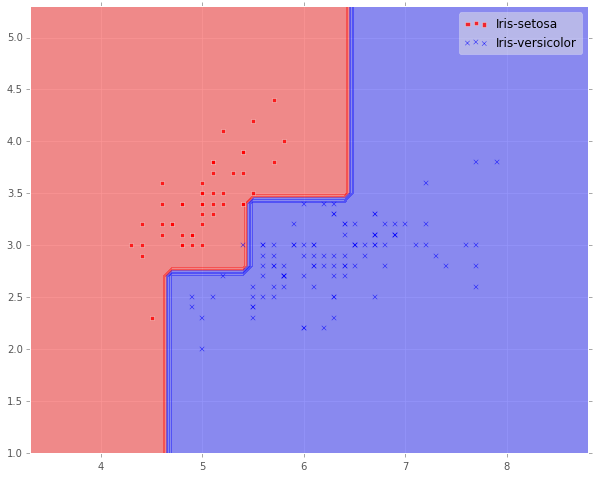

In [13]:
# %pdb
print " Plotting the Decision Surface of Training Set... "
t.plot_decision_regions(X[:,feat],Y,clf=dt, res=0.1, cycle_marker=True, legend=1)

In [14]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape   


 Training Data Set Dimensions= (104L, 4L) Training True Class labels dimensions (104L,)
 Test Data Set Dimensions= (45L, 4L) Test True Class labels dimensions (104L,)


In [15]:
# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0,1]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)

In [16]:
#Lets test it on the set of unseen examples...
pclasses=dt.predict(Xtest[:,feat])

In [17]:
print pclasses

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']


Lets see how good we are doing...
==================

In [18]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

44
Accuracy =  0.977777777778


 Plotting the Decision Surface of Training Set... 
[0 0 0 ..., 1 1 1] <type 'numpy.int32'> False


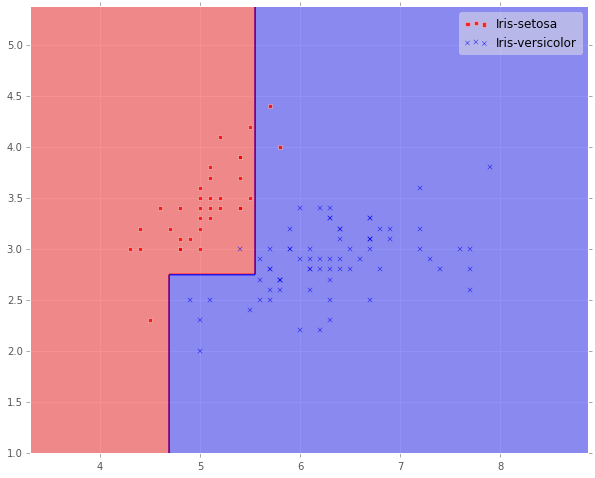

In [19]:
#Lets plot the decision surface
print " Plotting the Decision Surface of Training Set... "
t.plot_decision_regions(Xtrain[:,feat],Ytrain,clf=dt, res=0.02, cycle_marker=True, legend=1)

 Plotting the Decision Surface of Test Set... 
[0 0 0 ..., 1 1 1] <type 'numpy.int32'> False


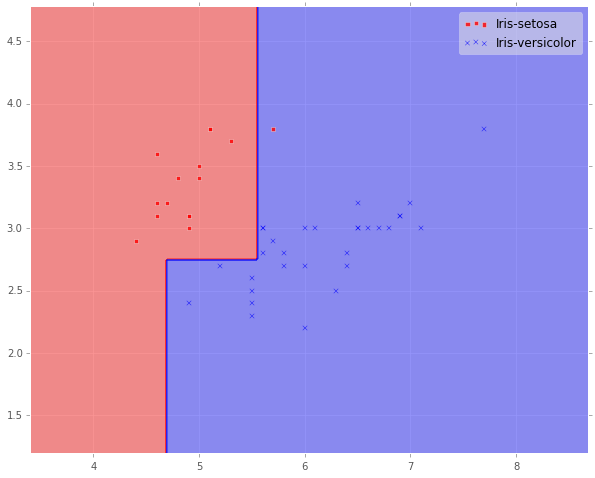

In [20]:
print " Plotting the Decision Surface of Test Set... "
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=dt, res=0.02, cycle_marker=True, legend=1)

#Lets Train on all four features....

In [21]:
#Lets Train on all four features....

# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

45
Accuracy =  1.0


#Lets Train on all four features and for all three classes....

In [22]:
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape

 Data Set Dimensions= (149L, 4L)  True Class labels dimensions (149L,)


In [23]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape   


 Training Data Set Dimensions= (104L, 4L) Training True Class labels dimensions (104L,)
 Test Data Set Dimensions= (45L, 4L) Test True Class labels dimensions (104L,)


In [24]:
feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

40
Accuracy =  0.888888888889


What can you conclude ?
====================
Please write your observation....



#Cross-Validation

Until now we have been splitting the dataset into a training and test set rather randomly and were reporting a rather artifical performance. Now we are going to test our system exhaustively by making use of k-fold [cross validation](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

Now go and tune your hyper-parameters (purity, exthreshold) to opitmize the performance.

In [25]:
# Now lets cross validate for best paramters, and test the result...
# We will be training four different models on four different partitions of data set and 
# then will be reporting the mean accuracy of the four classifiers.

nfolds=4 # lets use four folds..
folds=t.generate_folds(X,Y,nfolds)
features=[0,1, 2, 3] # features to use for our system
#now lets train and test on these folds...

#Lets perform the grid search...
purity=np.linspace(0.85,0.97,13) # You can also search over depth as well....
nexamp=np.linspace(5,25,21)  

params=np.zeros((len(purity),len(nexamp)))
                   
for p in range(len(purity)):
    for n in range(len(nexamp)):
        totacc=[]
        for k in range(nfolds):
            dt=DecisionTree(purity[p],nexamp[n])
            dt.train(folds[k][0][:,features],folds[k][1])
            pclasses=dt.predict(folds[k][2][:,features])
            acc=np.sum(pclasses==folds[k][3])/float(folds[k][3].shape[0])
            print "[Info] Fold {} Accuracy = {}".format(k+1, acc)
            totacc.append(acc)
        params[p,n]=np.mean(totacc)
        print totacc, '\nPurity={}, Nexample-threshold={}, Mean Accuracy ={}'.format(purity[p],nexamp[n], np.mean(totacc))

Generating CV data for 3 classes
[Info] Fold 1 Accuracy = 0.944444444444
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.944444444444
[Info] Fold 4 Accuracy = 0.916666666667
[0.94444444444444442, 0.94444444444444442, 0.94444444444444442, 0.91666666666666663] 
Purity=0.85, Nexample-threshold=5.0, Mean Accuracy =0.9375
[Info] Fold 1 Accuracy = 0.944444444444
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.944444444444
[Info] Fold 4 Accuracy = 0.916666666667
[0.94444444444444442, 0.94444444444444442, 0.94444444444444442, 0.91666666666666663] 
Purity=0.85, Nexample-threshold=6.0, Mean Accuracy =0.9375
[Info] Fold 1 Accuracy = 0.944444444444
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.944444444444
[Info] Fold 4 Accuracy = 0.916666666667
[0.94444444444444442, 0.94444444444444442, 0.94444444444444442, 0.91666666666666663] 
Purity=0.85, Nexample-threshold=7.0, Mean Accuracy =0.9375
[Info] Fold 1 Accuracy = 0.944444444444
[Info] Fold 

In [26]:
np.save('dt-cv',params)

In [27]:
print params

[[ 0.9375      0.9375      0.9375      0.9375      0.9375      0.9375
   0.9375      0.9375      0.9375      0.9375      0.9375      0.9375
   0.9375      0.9375      0.9375      0.9375      0.9375      0.9375
   0.9375      0.9375      0.9375    ]
 [ 0.9375      0.9375      0.9375      0.9375      0.9375      0.9375
   0.9375      0.9375      0.9375      0.9375      0.9375      0.9375
   0.9375      0.9375      0.9375      0.9375      0.9375      0.9375
   0.9375      0.9375      0.9375    ]
 [ 0.9375      0.9375      0.9375      0.9375      0.9375      0.9375
   0.9375      0.9375      0.9375      0.9375      0.9375      0.9375
   0.9375      0.9375      0.9375      0.9375      0.9375      0.9375
   0.9375      0.9375      0.9375    ]
 [ 0.9375      0.9375      0.9375      0.9375      0.9375      0.9375
   0.9375      0.9375      0.9375      0.9375      0.9375      0.9375
   0.9375      0.9375      0.9375      0.9375      0.9375      0.9375
   0.9375      0.9375      0.9375    ]
 [ 0

In [28]:
print params.shape

(13L, 21L)


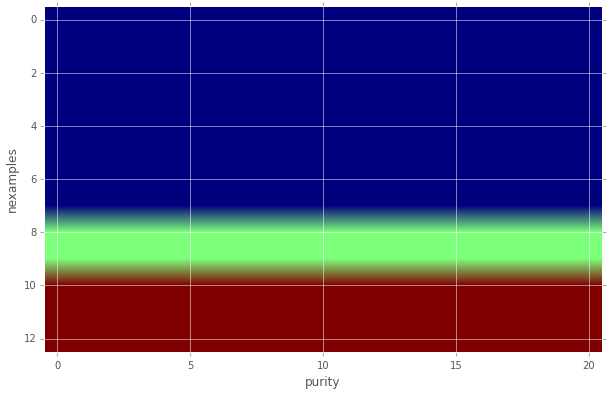

In [29]:
plt.imshow(params) # displayc the accuracy as 2D image...
plt.xlabel('purity')
plt.ylabel('nexamples') # ticks are not aligned..
#plt.xlim(purity.min(),purity.max())
#plt.ylim(nexamp.min(),nexamp.max())

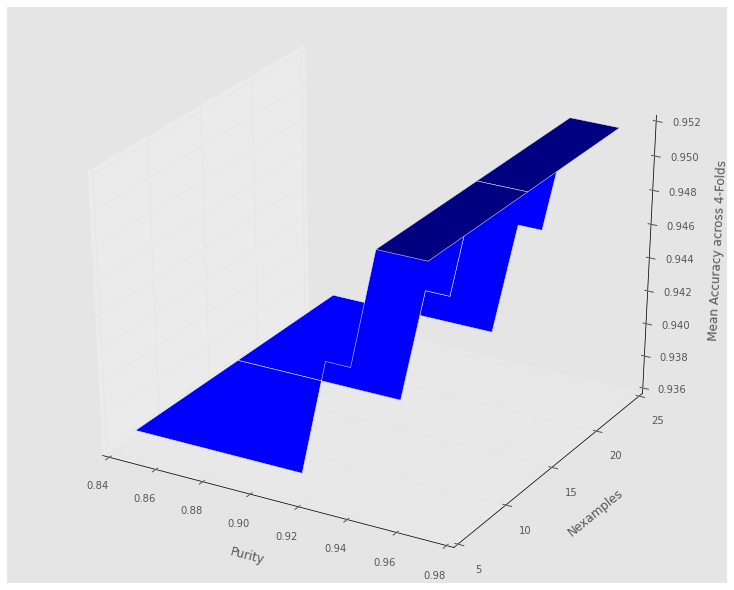

In [30]:
# A more better representation...
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
tX, tY = np.meshgrid(purity, nexamp)
ax.plot_surface(tX,tY,params.T)
ax.set_xlabel('Purity')
ax.set_ylabel('Nexamples')
ax.set_zlabel('Mean Accuracy across {}-Folds'.format(nfolds))
# ax.scatter3D(data['SepalLength'],data['PetalLength'],data['PetalWidth'])
#(params,ax,'Purity','Example-Threshold','Mean-Accuracy')

In [31]:
#print the row and column  index of m
#single line code
ridx,cidx= np.unravel_index(np.argmax(params), params.shape)

# simple step-wise code

cidx=np.argmax(params.max(axis=0))
ridx=np.argmax(params[:,cidx])
print ridx, cidx

10 0


In [32]:
print 'CV Best Parameters are, purity={}, nexamp={}, mean accuracy={}'.format(purity[ridx],nexamp[cidx],params[ridx,cidx])

CV Best Parameters are, purity=0.95, nexamp=5.0, mean accuracy=0.951388888889


This is the true representative accuracy measure of our system. Since, we are removing the selection bias and hence can be much more confidently use the score as a reflection of our system's performance.